# This script contains the following points:

### Importing Data & visualization Libraries
### Exploring Relationships 
    Correlations
    Scatterplots
    Pair Plots
    Categorical Plots
### Q7 & Q8

## Importing Data & visualization Libraries

In [1]:
# Importing Data & visualization Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# assigning path
path=r'C:\Users\Gal-E\CF Data Analysis\Achievement 6'

# import "immodata_cleaned.pkl" dataframe from "Prepared Data" folder
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_cleaned.pkl'))

In [3]:
matplotlib.__version__

'3.8.0'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
df.head()

bundesland                 city                      district  \
0  Nordrhein_Westfalen             Dortmund                      SchÃ¼ren   
1              Sachsen              Dresden  Ã„uÃŸere_Neustadt_Antonstadt   
2               Bremen               Bremen             Neu_Schwachhausen   
3              Sachsen  Mittelsachsen_Kreis                      Freiberg   
5   Baden_WÃ¼rttemberg    Emmendingen_Kreis                    Denzlingen   

                        street  zip_code  has_kitchen  balcony   lift  garden  \
0   Sch&uuml;ruferstra&szlig;e     44269        False    False  False    True   
1                    Turnerweg      1097        False     True   True   False   
2  Hermann-Henrich-Meier-Allee     28213        False     True  False   False   
3                   Am Bahnhof      9599        False    False  False    True   
5               no_information     79211         True    False  False   False   

   floor     flat_type  telekom_uploadspeed firing_type  \
0    1.0  ground_floor                 10.0         oil   
1    3.0     apartment                  2.4         NaN   
2    1.0     apartment                  NaN         gas   
3    1.0           NaN                  2.4         NaN   
5    2.0   roof_storey                 40.0         oil   

                     heating_type  number_of_rooms  square_meter  base_rent  \
0                 central_heating                4            86        595   
1                   floor_heating                3            84        965   
2  self_contained_central_heating                3            85        765   
3  self_contained_central_heating                2            62        310   
5                     oil_heating                2            53        580   

   total_rent  service_charge immoscout_id  
0         840           245.0     96107057  
1        1300           255.0    113147523  
2         903           138.0    114751222  
3         380            70.0    114391930  
5         690           110.0    106416361

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186123 entries, 0 to 228331
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   bundesland           186123 non-null  object  
 1   city                 186123 non-null  object  
 2   district             186123 non-null  object  
 3   street               186123 non-null  object  
 4   zip_code             186123 non-null  int64   
 5   has_kitchen          186123 non-null  bool    
 6   balcony              186123 non-null  bool    
 7   lift                 186123 non-null  bool    
 8   garden               186123 non-null  bool    
 9   floor                186123 non-null  float64 
 10  flat_type            161074 non-null  category
 11  telekom_uploadspeed  164028 non-null  float64 
 12  firing_type          150175 non-null  category
 13  heating_type         160282 non-null  category
 14  number_of_rooms      186123 non-null  int32   
 15  squar

In [7]:
df.describe().apply(lambda x: x.apply('{0:.0f}'.format))

zip_code   floor telekom_uploadspeed number_of_rooms square_meter  \
count   186123  186123              164028          186123       186123   
mean     35642       2                  29               3           73   
std      27817       2                  16               1           30   
min        852      -1                   1               1            0   
25%       9113       1                  10               2           54   
50%      35796       2                  40               3           67   
75%      53844       3                  40               3           85   
max      99994      45                 100              16          649   

      base_rent total_rent service_charge  
count    186123     186123         186123  
mean        635        806            150  
std         479        539             86  
min           0          0              0  
25%         330        465             95  
50%         480        640            135  
75%         785        975            187  
max        8700       9000           6045

## Exploring Relationships

### Correlation:

In [12]:
df.columns

Index(['bundesland', 'city', 'district', 'street', 'zip_code', 'has_kitchen',
       'balcony', 'lift', 'garden', 'floor', 'flat_type',
       'telekom_uploadspeed', 'firing_type', 'heating_type', 'number_of_rooms',
       'square_meter', 'base_rent', 'total_rent', 'service_charge',
       'immoscout_id'],
      dtype='object')

In [39]:
# i was getting this error "ValueError: could not convert string to float:" when i run the df.corr()
# to avoid that error i dropped these columns.
# remaining columns are usefull to answer the question from previous task

df2 = df.drop(columns = ['bundesland', 'city', 'district', 'street', 'telekom_uploadspeed', 'firing_type', 'heating_type', 'floor', 'flat_type'], axis = 1)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186123 entries, 0 to 228331
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   zip_code         186123 non-null  int64  
 1   has_kitchen      186123 non-null  bool   
 2   balcony          186123 non-null  bool   
 3   lift             186123 non-null  bool   
 4   garden           186123 non-null  bool   
 5   number_of_rooms  186123 non-null  int32  
 6   square_meter     186123 non-null  int32  
 7   base_rent        186123 non-null  int64  
 8   total_rent       186123 non-null  int64  
 9   service_charge   186123 non-null  float64
 10  immoscout_id     186123 non-null  object 
dtypes: bool(4), float64(1), int32(2), int64(3), object(1)
memory usage: 10.7+ MB


In [38]:
# Create a correlation matrix using pandas

df2.corr()

zip_code  has_kitchen   balcony      lift    garden  \
zip_code         1.000000     0.180164  0.099386  0.056700 -0.024631   
has_kitchen      0.180164     1.000000  0.063224  0.142901  0.056623   
balcony          0.099386     0.063224  1.000000  0.214522 -0.019207   
lift             0.056700     0.142901  0.214522  1.000000 -0.069381   
garden          -0.024631     0.056623 -0.019207 -0.069381  1.000000   
number_of_rooms  0.094907    -0.043339  0.200120 -0.020815  0.068811   
square_meter     0.141552     0.085375  0.254384  0.129241  0.076606   
base_rent        0.279382     0.293585  0.259638  0.319991  0.024603   
total_rent       0.264700     0.279207  0.271088  0.329237  0.023399   
service_charge   0.134211     0.149292  0.227303  0.267954  0.044172   
immoscout_id     0.000319    -0.021994  0.037447  0.065616 -0.071193   

                 number_of_rooms  square_meter  base_rent  total_rent  \
zip_code                0.094907      0.141552   0.279382    0.264700   
has_kitchen            -0.043339      0.085375   0.293585    0.279207   
balcony                 0.200120      0.254384   0.259638    0.271088   
lift                   -0.020815      0.129241   0.319991    0.329237   
garden                  0.068811      0.076606   0.024603    0.023399   
number_of_rooms         1.000000      0.759711   0.438238    0.472904   
square_meter            0.759711      1.000000   0.710926    0.745139   
base_rent               0.438238      0.710926   1.000000    0.989441   
total_rent              0.472904      0.745139   0.989441    1.000000   
service_charge          0.472774      0.681622   0.633189    0.703582   
immoscout_id            0.027678      0.026053   0.069085    0.070592   

                 service_charge  immoscout_id  
zip_code               0.134211      0.000319  
has_kitchen            0.149292     -0.021994  
balcony                0.227303      0.037447  
lift                   0.267954      0.065616  
garden                 0.044172     -0.071193  
number_of_rooms        0.472774      0.027678  
square_meter           0.681622      0.026053  
base_rent              0.633189      0.069085  
total_rent             0.703582      0.070592  
service_charge         1.000000      0.054169  
immoscout_id           0.054169      1.000000

In [40]:
# Create a correlation heatmap using matplotlib

plt.matshow(df2.corr())
plt.show()

In [47]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(11, 11))                                            # setting figure size 
plt.matshow(df2.corr(), fignum=f.number)                                    # type of plot
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=11, rotation=45)      # x axis labels
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=11)                   # y axis labels
cb = plt.colorbar()                                                         # adding a colour legend (called colorbar)
cb.ax.tick_params(labelsize=11)                                             # setting font size
plt.title('Correlation Matrix', fontsize=14)                                # adding title

Text(0.5, 1.0, 'Correlation Matrix')

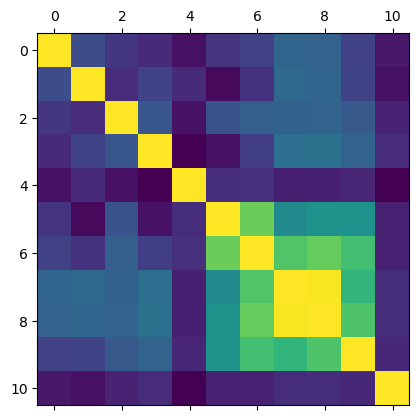

In [52]:
# save figure

plt.matshow(df2.corr())
plt.savefig("out.png")

### Correlation heatmap using seaborn:

In [58]:
df2.columns

Index(['zip_code', 'has_kitchen', 'balcony', 'lift', 'garden',
       'number_of_rooms', 'square_meter', 'base_rent', 'total_rent',
       'service_charge', 'immoscout_id'],
      dtype='object')

In [59]:
# Creating a subset excluding the "immoscout_id" and "service_charge"column

sub = df2[['zip_code', 'has_kitchen', 'balcony', 'lift', 'garden',
       'number_of_rooms', 'square_meter', 'base_rent', 'total_rent']]

In [60]:
sub

zip_code  has_kitchen  balcony   lift  garden  number_of_rooms  \
0          44269        False    False  False    True                4   
1           1097        False     True   True   False                3   
2          28213        False     True  False   False                3   
3           9599        False    False  False    True                2   
5          79211         True    False  False   False                2   
...          ...          ...      ...    ...     ...              ...   
228326      8058         True    False  False   False                2   
228327      9119        False     True  False    True                2   
228328     45279        False    False  False   False                3   
228330     68519         True     True  False   False                4   
228331     65552        False     True  False    True                4   

        square_meter  base_rent  total_rent  
0                 86        595         840  
1                 84        965        1300  
2                 85        765         903  
3                 62        310         380  
5                 53        580         690  
...              ...        ...         ...  
228326            60        300         440  
228327            55        248         368  
228328            85        590         670  
228330           115        930        1150  
228331            95        650         930  

[186123 rows x 9 columns]

In [70]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

# on my pc somehow it only placed in a first row. 
# tried it on the jupiter notebook from the exercise example but still getting the same result /only on the first row/

### Scatterplots:

In [71]:
df.columns

Index(['bundesland', 'city', 'district', 'street', 'zip_code', 'has_kitchen',
       'balcony', 'lift', 'garden', 'floor', 'flat_type',
       'telekom_uploadspeed', 'firing_type', 'heating_type', 'number_of_rooms',
       'square_meter', 'base_rent', 'total_rent', 'service_charge',
       'immoscout_id'],
      dtype='object')

In [73]:
# Creating a scatterplot for the "square_meter" and "total_ren" columns in seaborn

sns.lmplot(x = 'square_meter', y = 'total_rent', data = df)

the listings with higher square meter numbers has the high rent.

### Pair Plots:

In [74]:
# Keeping only the variables that i want in pair plot

sub_2 = df[['zip_code', 'has_kitchen', 'number_of_rooms', 'square_meter', 'total_rent']]

In [75]:
# Create a pair plot 

g = sns.pairplot(sub_2)

C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=densit

### Categorical Plots:

In [88]:
## Rent and Square meter

# 1. set figure size
fig = plt.figure(figsize=(20,18) )

# 2. group by the total_remt and square_meter
rent_price = df.groupby('total_rent')['square_meter'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='total_rent', y = 'square_meter', data = rent_price, palette = 'pastel')
plt.title("Average Rent and Sqm")
plt.xticks(rotation = 90)

(array([   0,    1,    2, ..., 3210, 3211, 3212]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '6'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '20'),
  Text(9, 0, '50'),
  Text(10, 0, '60'),
  Text(11, 0, '62'),
  Text(12, 0, '65'),
  Text(13, 0, '70'),
  Text(14, 0, '75'),
  Text(15, 0, '80'),
  Text(16, 0, '85'),
  Text(17, 0, '97'),
  Text(18, 0, '100'),
  Text(19, 0, '105'),
  Text(20, 0, '112'),
  Text(21, 0, '115'),
  Text(22, 0, '120'),
  Text(23, 0, '121'),
  Text(24, 0, '125'),
  Text(25, 0, '130'),
  Text(26, 0, '133'),
  Text(27, 0, '135'),
  Text(28, 0, '136'),
  Text(29, 0, '138'),
  Text(30, 0, '140'),
  Text(31, 0, '142'),
  Text(32, 0, '143'),
  Text(33, 0, '147'),
  Text(34, 0, '149'),
  Text(35, 0, '150'),
  Text(36, 0, '154'),
  Text(37, 0, '155'),
  Text(38, 0, '157'),
  Text(39, 0, '159'),
  Text(40, 0, '160'),
  Text(41, 0, '162'),
  Text(42, 0, '163'),
  Text(43, 0, '164'),
  Text(44, 0, '16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '15'),
  Text(14, 0, '16')])

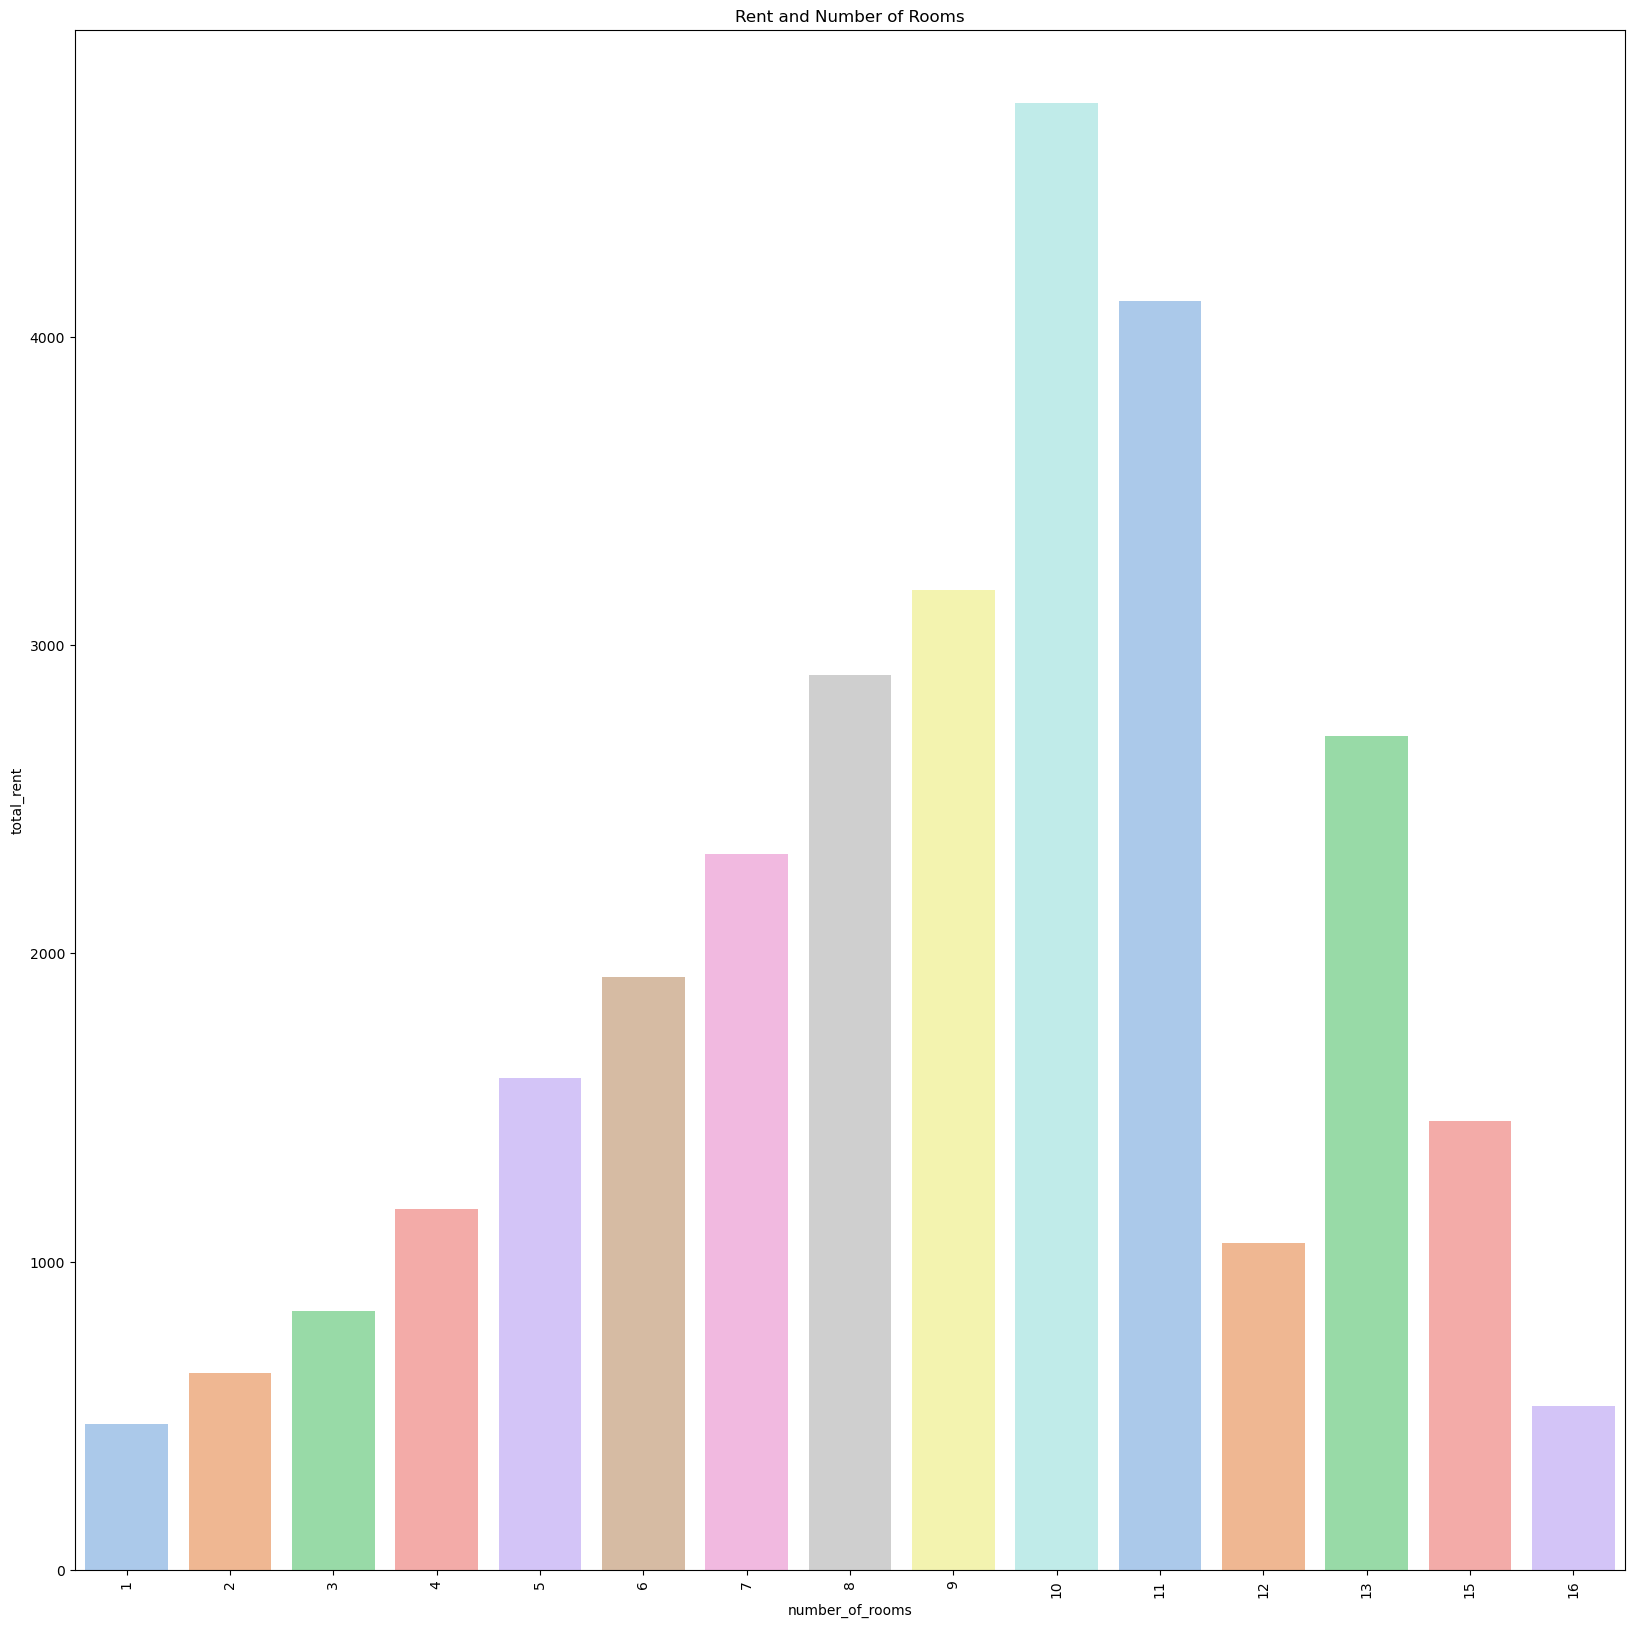

In [89]:
# Number of rooms and Rent

# 1. set figure size
fig = plt.figure(figsize=(20,20) )

# 2. group by the number_of_rooms and total_rent
rent_price = df.groupby('number_of_rooms')['total_rent'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='number_of_rooms', y = 'total_rent', data = rent_price, palette = 'pastel')
plt.title("Rent and Number of Rooms")
plt.xticks(rotation = 90)

C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_rent', ylabel='Count'>

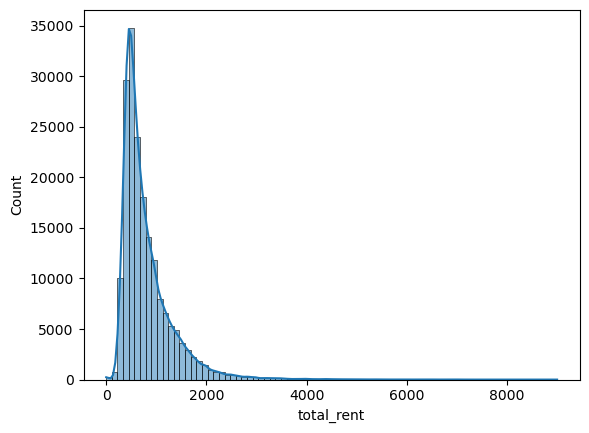

In [91]:
# Using a histogram to visualize the distribution of the total_rent. 

sns.histplot(df['total_rent'], bins = 80, kde = True)

In [92]:
df.loc[df['total_rent'] < 500, 'Price category'] = 'Low price'

In [93]:
df.loc[(df['total_rent'] >= 500) & (df['total_rent'] < 1200), 'Price category'] = 'Middle price'

In [94]:
df.loc[df['total_rent'] >= 1200, 'Price category'] = 'High price'

In [95]:
df['Price category'].value_counts(dropna = False)

Price category
Middle price    98538
Low price       57428
High price      30157
Name: count, dtype: int64

In [96]:
df.columns

Index(['bundesland', 'city', 'district', 'street', 'zip_code', 'has_kitchen',
       'balcony', 'lift', 'garden', 'floor', 'flat_type',
       'telekom_uploadspeed', 'firing_type', 'heating_type', 'number_of_rooms',
       'square_meter', 'base_rent', 'total_rent', 'service_charge',
       'immoscout_id', 'Price category'],
      dtype='object')

C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gal-E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


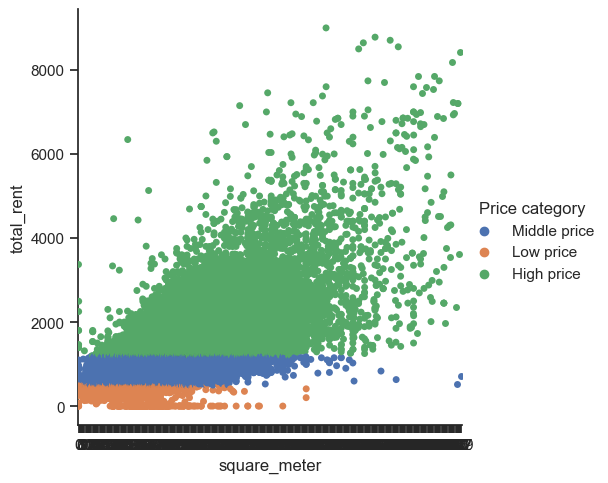

In [97]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="square_meter", y="total_rent", hue="Price category", data=df)

In [98]:
# fig = g.get_figure()
g.savefig("out.png") 

### Q7 & Q8

Q7: Types of listing that people are interested most, and i was also able to see square meter and number of rooms were the variables that contributed the most to total rent. I was also able to see from the zip code that there are some areas in germany that has higher rent price compared to other. We need further visualization on that to see it more clearly. and comparing further variables may give us more insights.
Q8: People are interested in the location, type of energy used and some choice factors in making a decsion for a flat.
States with higher or lower rent price depends on the states population. (further data needed)
States with higher or lower rent price depends on average incomes of that state. (further data needed)s?